# Computer assisted proof of small negative segments for the Northcott property of zeta function over number fields

## Function definitions.

In [67]:
var('x,t')

F1(x) = 1 / sqrt(pi) * (22.38/(2*pi))^(1/2-x) * 1 / zeta(1-x) * gamma(1-x)
G1(x,t) = sqrt(abs((sin(pi*(x+i*t)))/cosh(pi*t)))


F2(x) = sqrt(2) / sqrt(pi) * (22.38/(2*pi))^(1/2-x) * gamma(1-x) / zeta(1-x)
G2(x,t) = abs(sin(pi / 2 *(x+i*t)))/cosh(pi / 2 * t)

# Finds the minimal height in the decreasing-increasing case. 
def interv_dec_inc(F,G, xmin, xmax, precision):
    # Warnings
    interv_warning(xmin,xmax)
    
    if n(derivative(G,x)((xmax+xmin)/2,0))< 0:
        show('Warning: Negative derivative with increasing assumption')
    
    seglist = []
    step = (xmax-xmin)/precision
    height = 0
    for k in range(precision):
        a = xmin+k*step
        b = xmin+(k+1)*step
        
        while n(F(b)*G(a,height*step)) > 1 and height > 0:
            height -= 1
        while n(F(b)*G(a,height*step)) <= 1:
            height += 1
            
        seglist.append([(a,height*step),(b,height*step)])
    return seglist

# Finds the minimal height in the decreasing-decreasing case. 
def interv_dec_dec(F,G, xmin, xmax, precision):
    # Warnings
    interv_warning(xmin,xmax)
    
    if n(derivative(G,x)((xmax+xmin)/2,0))> 0:
        show('Warning: Positive derivative with decreasing assumption')
    
    seglist = []
    step = (xmax-xmin)/precision
    height = 0
    for k in range(precision):
        a = xmin+k*step
        b = xmin+(k+1)*step
        
        while n(F(b)*G(b,height*step)) > 1 and height > 0:
            height -= 1
        while n(F(b)*G(b,height*step)) <= 1:
            height += 1
            
        seglist.append([(a,height*step),(b,height*step)])
    return seglist

# Function to compare two lists (usually one comes froms gamma_C and the other from gamma_R)
# and choose the worst one (in terms of height)
def worst_case(list1,list2):
    wlist = []
    lgt = min(len(list1),len(list2))
    for k in range(0,lgt):
        if list1[k][0][1]>list2[k][0][1]:
            wlist.append(list1[k])
        else:
            wlist.append(list2[k])
    return wlist


# Draw the segments
def draw(seglist):
    S = line(seglist[0])
    for l in range(1,len(seglist)):
        S = S+line(seglist[l])
    return S

# Zooming on interesting part
def zoom(seglist):
    if seglist[0][0][1] > 0:
        show('Good minimum already achieved')
        xmin = seglist[0][0][0]
    else:
        for l in range(len(seglist)):
            if seglist[l][0][1] == 0:
                next
            elif seglist[l-1][0][1] == 0:
                xmin = seglist[l][0][0]
            else:
                break
    if seglist[len(seglist)-1][1][1] > 0:
        show('Good maximum already achieved')
        xmax = seglist[len(seglist)-1][1][0] 
    else:
        for l in range(len(seglist)):
            if seglist[len(seglist)-l-1][1][1] == 0:
                next
            elif seglist[len(seglist)-l][1][1] == 0:
                xmax = seglist[len(seglist)-l-1][1][0]
            else:
                break
    
    return (xmin,xmax)

def radmax(center,seglist):
    rmax = 0
    for seg in seglist:
        if seg[0][1] != 0:
            rdist2 = (seg[1][0]-center)^2+seg[1][1]^2
            if rdist2 > rmax:
                rmax = rdist2
    return rmax

class IntervError(Exception):
    pass

def interv_warning(xmin,xmax):
    if xmin % -0.5 == 0:
        if (xmax < -0.5*(floor(xmin/-0.5)) or xmax > -0.5*(floor(xmin/-0.5) -1)):
            raise IntervError('Warning: This software is not designed to handle segments where the derivative of F or G changes sign. Please make sure that both xmin and xmax belong in the same interval [-n,-n+0.5].')
    elif (xmax < -0.5*(floor(xmin/-0.5)+1) or xmax > -0.5*(floor(xmin/-0.5))):
        raise IntervError('Warning: This software is not designed to handle segments where the derivative of F or G changes sign. Please make sure that both xmin and xmax belong in the same interval [-n,-n+0.5].')
    if xmin >= xmax:
        raise IntervError('Warning: xmin should be stricly smaller than xmax.')
    if  xmax > -0.65:
        show('Warning: This software is not designed to handle segments with xmax > -0.65. Your process might not terminate.')
    return



The two following cells are for manual calculations.
- Input valid intervals for xmin and xmax
- Select precision
- Run the cell

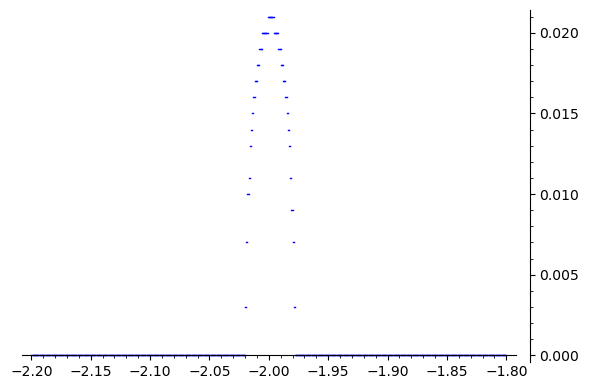

0.0222036033111745

0.0210000000000000

In [123]:
xmin, xmax = -2,-1.8
precision = 200
seglist = worst_case(
    interv_dec_inc(F1,G1,xmin,xmax,precision),
    interv_dec_inc(F2,G2,xmin,xmax,precision)
)

xmin, xmax = -2.2,-2
precision = 200
seglist2 = worst_case(
    interv_dec_dec(F1,G1,xmin,xmax,precision),
    interv_dec_dec(F2,G2,xmin,xmax,precision)
)

show(draw(seglist)+draw(seglist2))
show(sqrt(radmax(-2,seglist)))
show(sqrt(radmax(-2,seglist2)))

The following cell is used to zoom in the output of the last cell. You might need to run it multiple times.

Output:
 - Checks if min and max are optimal
 - Current [xmin,xmax]
 - Current maximal radius

'Good minimum already achieved'

'Good maximum already achieved'

(-2.00000000000000, -1.97899000000000)

'[-2.00000000000000, -1.97899000000000]'

'Current radius: 0.0211607313068334'

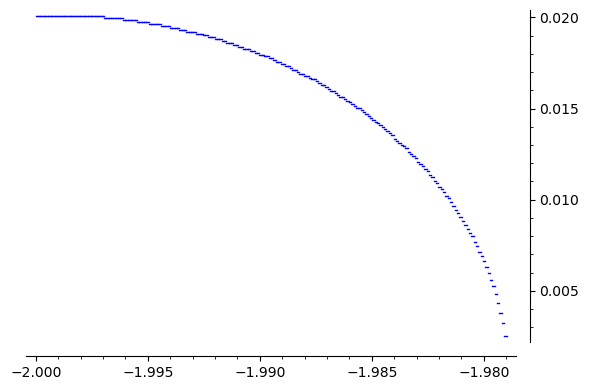

In [126]:
newbounds = zoom(seglist) 
show(newbounds)
xmin, xmax = newbounds[0], newbounds[1]

seglist = worst_case(
    interv_dec_inc(F1,G1,xmin,xmax,precision),
    interv_dec_inc(F2,G2,xmin,xmax,precision)
)
show(str([xmin,xmax]))
show('Current radius: ' + str(sqrt(radmax(-2,seglist))))
show(draw(seglist))

## Precoded cells for the first integers

The case of $n=-1$:

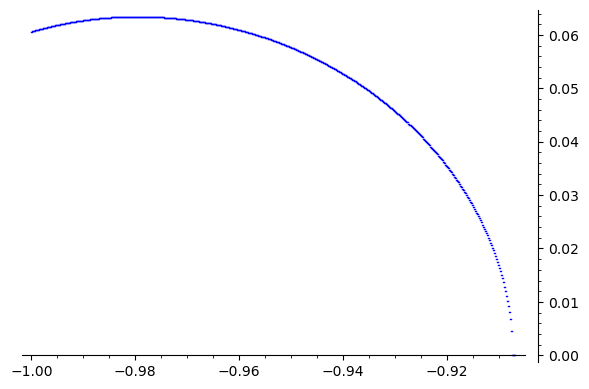

'Current radius: 0.0926216320430795'

In [122]:
xmin, xmax = -1,-0.906940000000000
precision = 2000
seglist = worst_case(
    interv_dec_inc(F1,G1,xmin,xmax,precision),
    interv_dec_dec(F2,G2,xmin,xmax,precision)
)


show(draw(seglist))
show('Current radius: ' + str(sqrt(radmax(-1,seglist))))

The case of $n=-2$:

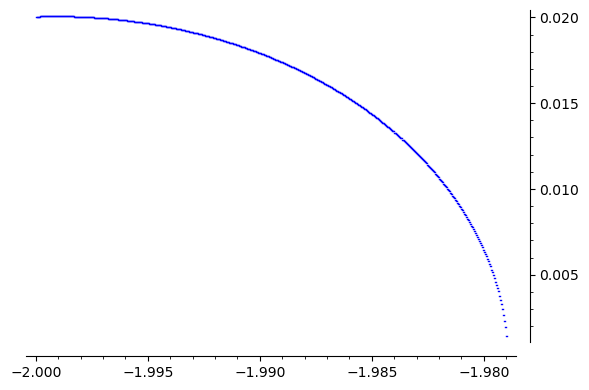

'Current radius: 0.0210585321976039'

In [129]:
xmin, xmax = -2,-1.97899000000000
precision = 2000
seglist = worst_case(
    interv_dec_inc(F1,G1,xmin,xmax,precision),
    interv_dec_inc(F2,G2,xmin,xmax,precision)
)


show(draw(seglist))
show('Current radius: ' + str(sqrt(radmax(-2,seglist))))

The case of $n = -3$:

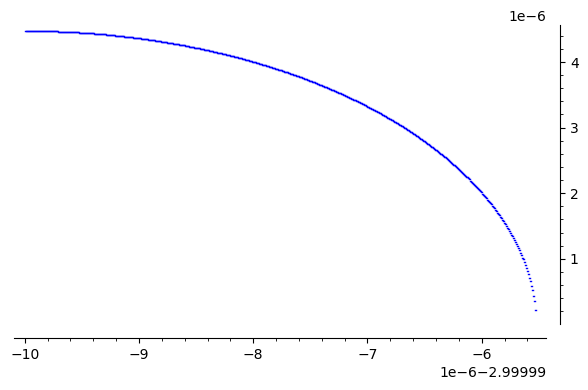

'Current radius: 4.47675217883685e-6'

In [99]:
xmin, xmax = -3,-2.99999552500000
precision = 2000
seglist = worst_case(
    interv_dec_inc(F1,G1,xmin,xmax,precision),
    interv_dec_dec(F2,G2,xmin,xmax,precision)
)


show(draw(seglist))
show('Current radius: ' + str(sqrt(radmax(-3,seglist))))

The case of $n = -4$:

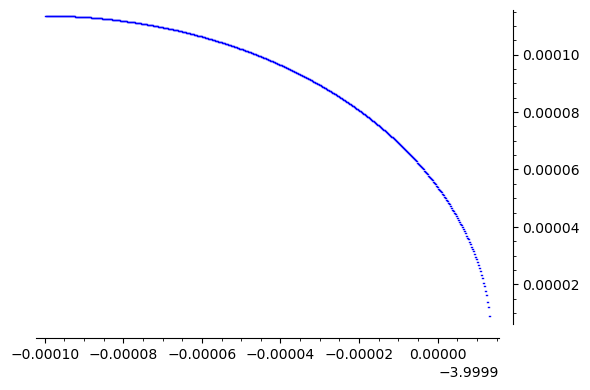

'Current radius: 0.000113587801802505'

In [107]:
xmin, xmax = -4,-3.99988672500000
precision = 2000
seglist = worst_case(
    interv_dec_inc(F1,G1,xmin,xmax,precision),
    interv_dec_inc(F2,G2,xmin,xmax,precision)
)


show(draw(seglist))
show('Current radius: ' + str(sqrt(radmax(-4,seglist))))

The case of $n = -5$:

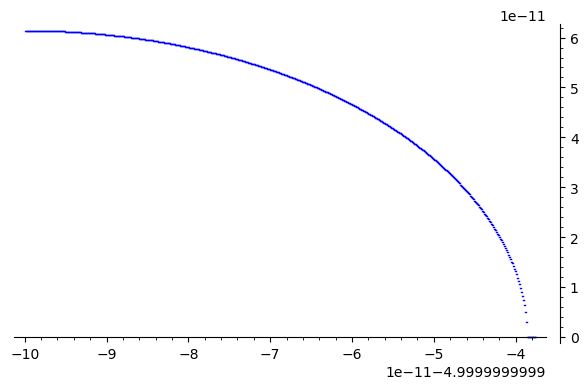

'Current radius: 6.14330610091810e-11'

In [116]:
# The case of n = -5
xmin, xmax = -5,-4.99999999993750
precision = 2000
seglist = worst_case(
    interv_dec_inc(F1,G1,xmin,xmax,precision),
    interv_dec_dec(F2,G2,xmin,xmax,precision)
)


show(draw(seglist))
show('Current radius: ' + str(sqrt(radmax(-5,seglist))))